In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
# from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import yfinance as yf

In [31]:
user_input = '2330.TW'
df = yf.download(user_input, period='5y')
df.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-04,227.5,229.0,227.0,229.0,195.938248,25959480
2018-06-05,230.0,230.0,226.5,229.0,195.938248,26534884
2018-06-06,229.0,230.0,227.0,230.0,196.793900,24767441
2018-06-07,231.0,231.5,228.0,230.0,196.793900,24958266
2018-06-08,229.0,229.0,226.0,227.0,194.227036,23548851


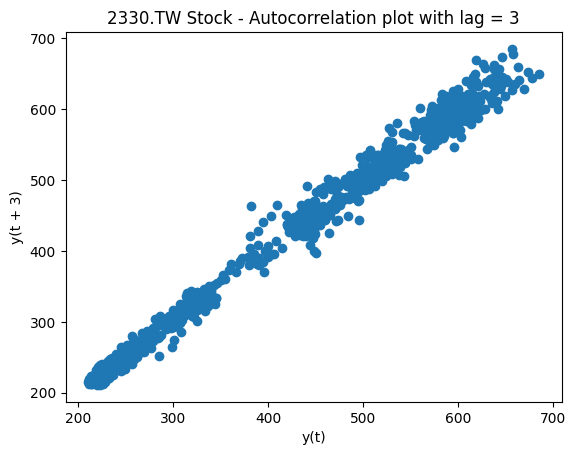

In [32]:
plt.figure()
lag_plot(df['Open'], lag=3)
plt.title(f'{user_input} Stock - Autocorrelation plot with lag = 3')
plt.show()

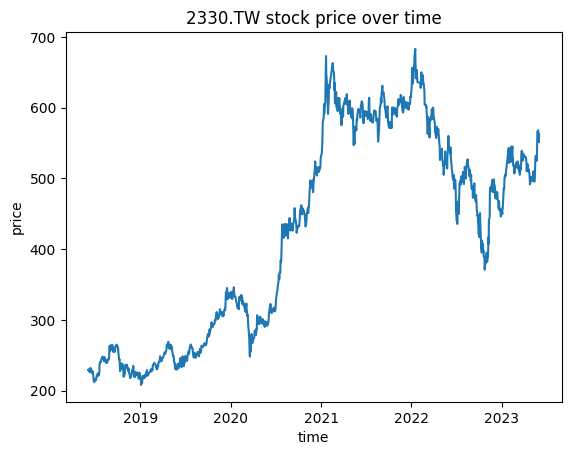

In [33]:
df = df.reset_index()
plt.plot(df["Date"], df["Close"])
plt.title(f"{user_input} stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [34]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
stepwise_fit = auto_arima(df['Close'], trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8352.501, Time=2.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8352.617, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8352.276, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8352.287, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8352.240, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8354.275, Time=0.50 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.162 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1217
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4175.120
Date:                Fri, 02 Jun 2023   AIC                           8352.240
Time:                        07:27:31   BIC                           8357.343
Sample:                             0   HQIC                          8354.161
                               - 1217                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        56.2114      1.418     39.636      0.000      53.432      58.991
===================================================================================
Ljung-Box (L1) (Q):                   2.34   Jarque-Bera (JB):               524.31
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               5.50   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
  # model = ARIMA(history, order=(0,1,0))
  # model_fit = model.fit(disp=0)
  model = sm.tsa.arima.ARIMA(history, order=(0,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  model_predictions.append(yhat)
  true_test_value = test_data[time_point]
  history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 90.13387978142076


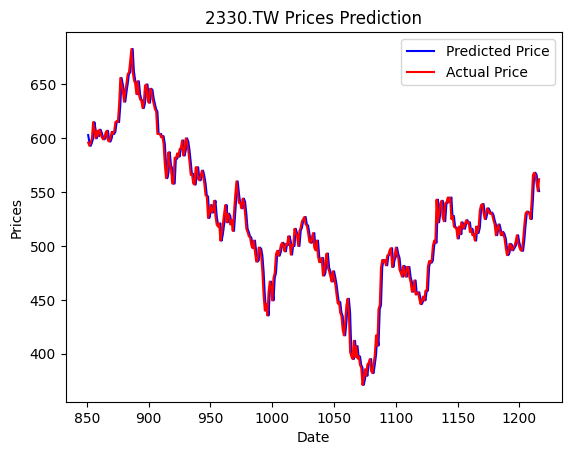

In [37]:
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title(f'{user_input} Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()